In [ ]:
# Basic libraries 
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

# Import Plotly for Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
# Statsmodels for Linear Regression
import statsmodels.api as sm

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# loading the csv file
df = pd.read_csv('esb_day_level.csv')
df_to_use = df[['dist', 'idling_mins', 'speed', 'region_NC', 'region_SC', 'region_RM', 'energy']]
df_to_use.dropna(inplace=True)
df_to_use.head(2)

,dist,idling_mins,speed,region_NC,region_SC,region_RM,energy
0,6.27,0.10,11.09,1,0,0,33.62
1,19.93,6.07,9.50,1,0,0,149.26


In [12]:
X = df_to_use.drop('energy', axis = 1) # Selecting independent features
y = df_to_use.energy # Selecting target variable

In [13]:
# Creating training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

In [14]:
# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [15]:
X_train # Visualizing X dataframe with the constant

,const,dist,idling_mins,speed,region_NC,region_SC,region_RM
1831,1.00,50.33,15.20,16.85,0,1,0
444,1.00,19.57,24.03,17.07,1,0,0
2688,1.00,87.00,102.00,9.99,0,0,0
1532,1.00,63.05,48.60,15.75,0,1,0
856,1.00,69.44,28.80,19.34,0,1,0
...,...,...,...,...,...,...,...
1638,1.00,41.14,54.60,11.24,0,1,0
1095,1.00,89.97,10.20,29.16,0,1,0
1130,1.00,72.47,24.60,26.88,0,1,0
1294,1.00,91.53,16.80,17.63,0,1,0


In [16]:
# Fitting model
model = sm.OLS(y_train, X_train, missing='drop').fit()
print(model.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1265.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:29:59   Log-Likelihood:                -8279.9
No. Observations:                1806   AIC:                         1.657e+04
Df Residuals:                    1799   BIC:                         1.661e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -52.1681      2.801    -18.626      

#creating the equation
# y(battery energy) 1.6(dist) + 0.058(idling_mins) ... -52.17

In [17]:
#Let’s move forward and predict values for our dependent variable Y in the testing set.
y_pred = model.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred,squared = False) # Computing RMSE
print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 21.87


In [18]:
import plotly.express as px
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Values', 'y': 'Predicted Values'}, title='Actual vs Predicted Values')
fig.show()

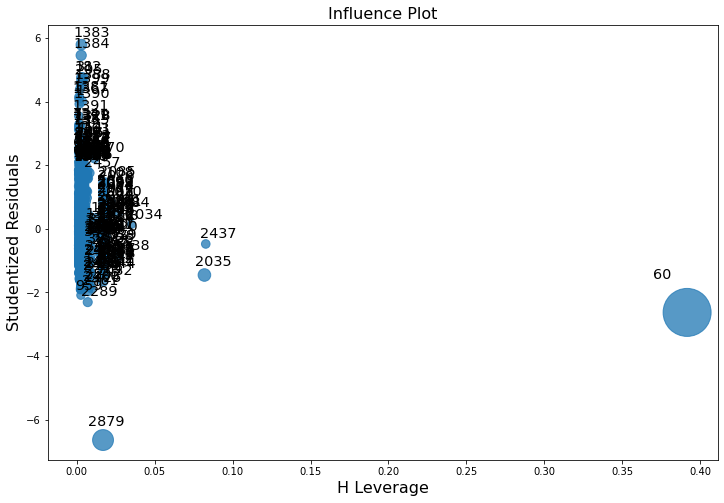

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

Text(0.5, 1.0, 'Linear Regression')

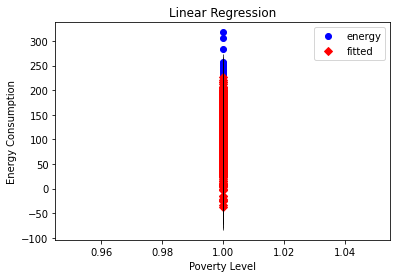

In [22]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 0, ax=ax)
ax.set_ylabel("Energy Consumption")
ax.set_xlabel("Poverty Level")
ax.set_title("Linear Regression")

OptionError: No such keys(s): 'mode.use_inf_as_null'

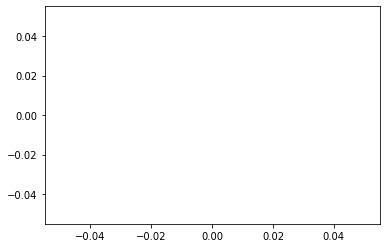

In [23]:
import seaborn as sns
sns.histplot(model.resid)